In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in data set
epi_df = pd.read_csv("epi_r.csv")
epi_df.describe()


#Links that helped me out during the creation of the report
#https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
#dropping duplicate rows and columns from dataset
epi_df = epi_df.drop_duplicates()
count = epi_df.nunique()
col_drop = count.loc[count.values==1].index
epi_df = epi_df.drop(col_drop, axis = 1)


#drop rows with nan values
epi_df = epi_df.dropna()
epi_df

#Row count now 14446

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([1777., 3522., 2781., 2009., 1352.,  883.,  588.,  382.,  259.,
         173.,  145.,   91.,   63.,   62.,   42.,   35.,   25.,   21.,
          23.,   18.,   15.,   14.,   10.,    6.,    5.,   11.,    6.,
          11.,    5.,    4.]),
 array([   0.        ,  133.33333333,  266.66666667,  400.        ,
         533.33333333,  666.66666667,  800.        ,  933.33333333,
        1066.66666667, 1200.        , 1333.33333333, 1466.66666667,
        1600.        , 1733.33333333, 1866.66666667, 2000.        ,
        2133.33333333, 2266.66666667, 2400.        , 2533.33333333,
        2666.66666667, 2800.        , 2933.33333333, 3066.66666667,
        3200.        , 3333.33333333, 3466.66666667, 3600.        ,
        3733.33333333, 3866.66666667, 4000.        ]),
 <BarContainer object of 30 artists>)

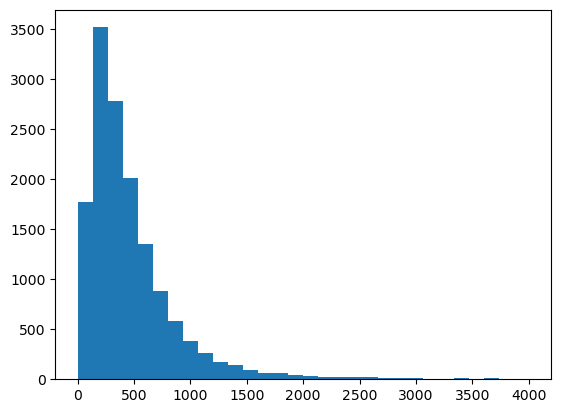

In [3]:
#distributions for continuous variables
#calories, protein, fat, sodium
#easy access column names
rating = epi_df['rating']
calories = epi_df['calories']
sodium = epi_df['sodium']
fat = epi_df['fat']
protein = epi_df['protein']

#Calories distribution
plt.hist(calories, bins=30, range= [0, 4000])


(array([4529., 2203., 1581., 1208.,  910.,  701.,  608.,  465.,  340.,
         334.,  241.,  181.,  145.,  133.,  108.,   75.,   68.,   62.,
          52.,   38.,   40.,   41.,   34.,   27.,   12.,   11.,   18.,
          23.,   13.,   13.]),
 array([   0.        ,  133.33333333,  266.66666667,  400.        ,
         533.33333333,  666.66666667,  800.        ,  933.33333333,
        1066.66666667, 1200.        , 1333.33333333, 1466.66666667,
        1600.        , 1733.33333333, 1866.66666667, 2000.        ,
        2133.33333333, 2266.66666667, 2400.        , 2533.33333333,
        2666.66666667, 2800.        , 2933.33333333, 3066.66666667,
        3200.        , 3333.33333333, 3466.66666667, 3600.        ,
        3733.33333333, 3866.66666667, 4000.        ]),
 <BarContainer object of 30 artists>)

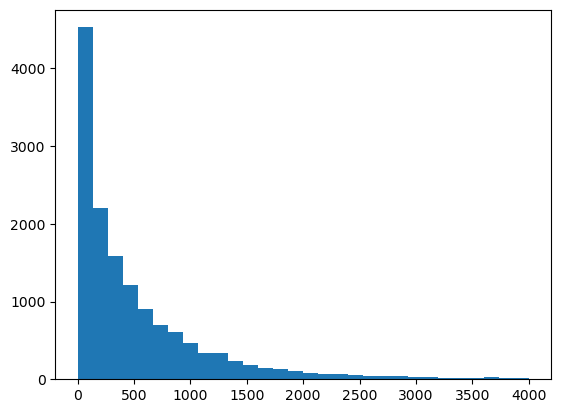

In [4]:
#sodium distribution
plt.hist(sodium, bins=30, range= [0, 4000])

(array([3030., 2535., 2138., 1803., 1236.,  784.,  608.,  489.,  321.,
         274.,  246.,  162.,  104.,  103.,   75.,   68.,   53.,   41.,
          25.,   29.,   28.,   22.,   21.,   15.,   22.,   10.,    7.,
          12.,   12.,   11.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

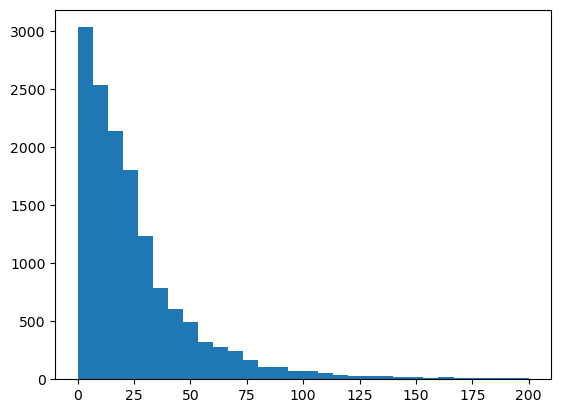

In [5]:
#fat distribution
plt.hist(fat, bins=30, range= [0, 200])

(array([3758., 2283., 1457., 1135.,  560.,  503.,  553.,  355.,  354.,
         440.,  341.,  280.,  376.,  220.,  194.,  195.,  162.,  106.,
         122.,   82.,   89.,   89.,   80.,   44.,   81.,   42.,   38.,
          46.,   20.,   46.]),
 array([  0.        ,   3.33333333,   6.66666667,  10.        ,
         13.33333333,  16.66666667,  20.        ,  23.33333333,
         26.66666667,  30.        ,  33.33333333,  36.66666667,
         40.        ,  43.33333333,  46.66666667,  50.        ,
         53.33333333,  56.66666667,  60.        ,  63.33333333,
         66.66666667,  70.        ,  73.33333333,  76.66666667,
         80.        ,  83.33333333,  86.66666667,  90.        ,
         93.33333333,  96.66666667, 100.        ]),
 <BarContainer object of 30 artists>)

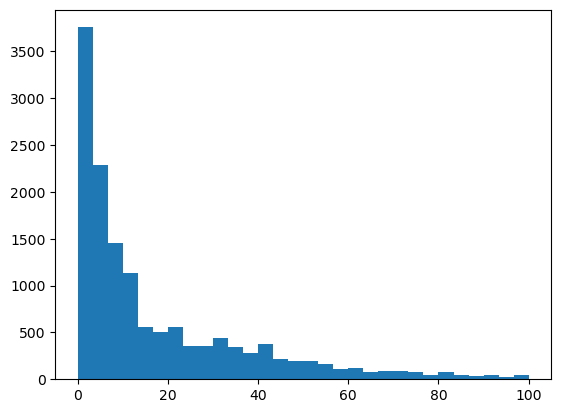

In [6]:
#protein distribution
plt.hist(protein, bins=30, range= [0, 100])

In [28]:
#Pearson R for all numeric attributes
#Calories correlation
print("Calories Pearson")
print(rating.corr(calories))

print("Sodium Pearson")
print(rating.corr(sodium))

print("Fat Pearson")
print(fat.corr(rating))

print("Protein Pearson")
print(rating.corr(protein))

#All continuous variables needed to be normalized based on histograms
#Normalize calories, sodium, fat, and protein

#add one to column to avoid division by 0 error
epi_df["Normalized_calories"] = np.log2(epi_df["calories"]+1)
norm_calories = epi_df["Normalized_calories"]
print()
print("Normalized calories Pearson")
print(rating.corr(norm_calories))

epi_df["Normalized_sodium"] = np.log2(epi_df["sodium"]+1)
norm_sodium = epi_df["Normalized_sodium"]
print()
print("Normalized sodium Pearson")
print(rating.corr(norm_sodium))

epi_df["Normalized_fat"] = np.log2(epi_df["fat"]+1)
norm_fat = epi_df["Normalized_fat"]
print()
print("Normalized fat Pearson")
print(rating.corr(norm_fat))

epi_df["Normalized_protein"] = np.log2(epi_df["protein"]+1)
norm_protein = epi_df["Normalized_protein"]
print()
print("Normalized protein Pearson")
print(rating.corr(norm_protein))

#All normalized numeric attributes have vastly improved Pearson R calculations
#Dropping non normalized calories, sodium, fat, protein for logistic regression
epi_df = epi_df.drop(["calories"], axis=1)
epi_df = epi_df.drop(["sodium"], axis=1)
epi_df = epi_df.drop(["fat"], axis=1)
epi_df = epi_df.drop(["protein"], axis=1)

Calories Pearson
0.007544854968161311
Sodium Pearson
0.007975280476179484
Fat Pearson
0.006927681815578601
Protein Pearson
0.012260939976423448

Normalized calories Pearson
0.1448476327164718

Normalized sodium Pearson
0.175796543048396

Normalized fat Pearson
0.20957028800489283

Normalized protein Pearson
0.18778640710800865


1.0000000000000002


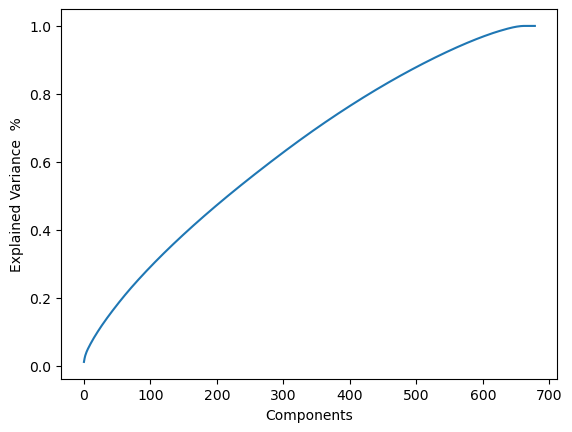

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#PCA on scrubbed data
#Drop title column
non_title_df = epi_df.drop(["title"], axis=1)

#Scale values for Sklearn
X = non_title_df.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#testing to see how PCA works with sklearn and all components
pca_680 = PCA(n_components = 679, random_state = 2020)
pca_680.fit(X_scaled)
X_pca_680 = pca_680.transform(X_scaled)

print(sum(pca_680.explained_variance_ratio_))
#1.00000002 - all columns explain ~100% of the variance

#Graphing elbow plot
plt.plot(np.cumsum(pca_680.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance  %")
plt.show()

0.06098246989457133


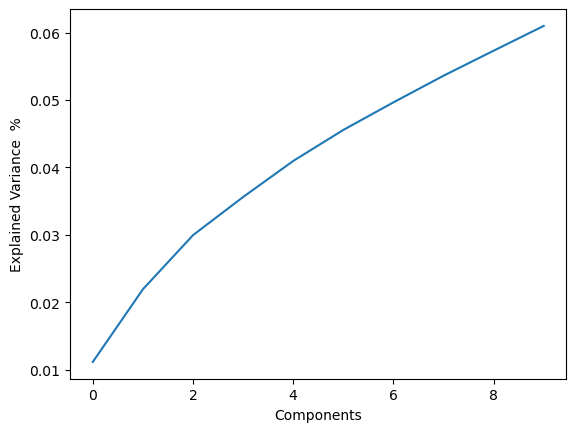

In [30]:
#reducing number of components to 10 for visualization purposes
pca_10 = PCA(n_components = 10, random_state = 2020)
pca_10.fit(X_scaled)
X_pca_10 = pca_10.transform(X_scaled)

print(sum(pca_10.explained_variance_ratio_))

#Graphing elbow plot
plt.plot(np.cumsum(pca_10.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance  %")
plt.show()

#Dataset does not have attributes that have a big explanation for the variance in the data
#Maybe an error on my part, but even with 10 components, only looking at an explained
#variance ratio of .06
#Top 10 attributes of the dataset explain only 6% of the variance of it

In [36]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

#epi_df = epi_df.drop(["title"], axis=1)
#create target and feature column for #cakeweek
y = epi_df["#cakeweek"]
non_target_df = epi_df.drop(["#cakeweek"], axis=1)
X = non_target_df

#create train and test split, 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

logreg = LogisticRegression(random_state=12)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['cakeweek', 'not cakeweek']
print(classification_report(y_test, y_pred, target_names=target_names))

[[3611    0]
 [   0    1]]
              precision    recall  f1-score   support

    cakeweek       1.00      1.00      1.00      3611
not cakeweek       1.00      1.00      1.00         1

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



In [44]:
#epi_df = epi_df.drop(["title"], axis=1)
#create target and feature column for #wasteless
y = epi_df["#wasteless"]
non_target_df = epi_df.drop(["#wasteless"], axis=1)
X = non_target_df

#create train and test split, 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)


logreg = LogisticRegression(random_state=4)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

target_names = ['wasteless']
print(classification_report(y_test, y_pred, target_names=target_names))

[[3612]]
              precision    recall  f1-score   support

   wasteless       1.00      1.00      1.00      3612

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



In [45]:
#epi_df = epi_df.drop(["title"], axis=1)
#create target and feature column for #cakeweek
y = epi_df["3-ingredient recipes"]
non_target_df = epi_df.drop(["3-ingredient recipes"], axis=1)
X = non_target_df

#create train and test split, 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


logreg = LogisticRegression(random_state=12)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

target_names = ['3 ingredient meals', 'not 3 ingredient meal']
print(classification_report(y_test, y_pred, target_names=target_names))

[[3602    0]
 [  10    0]]
                       precision    recall  f1-score   support

   3 ingredient meals       1.00      1.00      1.00      3602
not 3 ingredient meal       0.00      0.00      0.00        10

             accuracy                           1.00      3612
            macro avg       0.50      0.50      0.50      3612
         weighted avg       0.99      1.00      1.00      3612



C:\Users\jpper\anaconda32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jpper\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jpper\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [48]:
#creating healthy feature

#create set of conditions for healthy to be created
conditions = [
    (epi_df['apple'] == 1) | (epi_df['apricot'] == 1)| (epi_df['artichoke'] == 1)| (epi_df['arugula'] == 1)
    | (epi_df['asparagus'] == 1)| (epi_df['avocado'] == 1), 
    (epi_df['apple'] == 0) & (epi_df['apricot'] == 0) & (epi_df['artichoke'] == 0) & (epi_df['arugula'] == 0)
    & (epi_df['asparagus'] == 0) & (epi_df['avocado'] == 0)
]
#create set of values based on conditions
values = [
    1, 0
]
#create new column based on conditions
epi_df['#healthy'] = np.select(conditions, values)

health = epi_df['#healthy']
rating = epi_df['rating']
#look at correlation between columns
print(health.corr(rating))
#Pearson R of .0188


0.01884490916019294


In [49]:
#Create new logistic regression to evaluate success of new healthy feature
#epi_df = epi_df.drop(["title"], axis=1)
#create target and feature column for #cakeweek
y = epi_df["#healthy"]
non_target_df = epi_df.drop(["#healthy"], axis=1)
X = non_target_df

#create train and test split, 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)


logreg = LogisticRegression(random_state=3)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

target_names = ['healthy', 'not healthy']
print(classification_report(y_test, y_pred, target_names=target_names))

[[3297    0]
 [   0  315]]
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00      3297
 not healthy       1.00      1.00      1.00       315

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



C:\Users\jpper\anaconda32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
